In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (5,3)

/var/folders/5h/w_ddszcj1b9581y293ys2dw40000gn/T/ipykernel_62538/4006067650.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [32]:
d = pd.read_csv('Data3a.csv')
model_x = smf.glm('y ~ x', data=d, family=sm.families.Poisson()).fit()
model_const = smf.glm('y ~ 1', data=d, family=sm.families.Poisson()).fit()
print(model_x.summary())
print(model_const.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 30 May 2024   Deviance:                       84.993
Time:                        14:35:27   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.0

In [33]:
#devianceの差
deviance_diff = model_const.deviance - model_x.deviance
print(deviance_diff)

4.513941078851744


In [34]:
#model_constのinterceptをexpして平均値を求める
mean_const = np.exp(model_const.params['Intercept'])
#mean_constを使ってpoisson分布を１00個サンプリング
y_rnd = np.random.poisson(mean_const, 100)
#dにy_rndを追加
d['y_rnd'] = y_rnd
#glm
model_rnd_const = smf.glm('y_rnd ~ 1', data=d, family=sm.families.Poisson()).fit()
model_rnd_x = smf.glm('y_rnd ~ x', data=d, family=sm.families.Poisson()).fit()
#devianceの差
deviance_diff_rnd = model_rnd_const.deviance - model_rnd_x.deviance
print(deviance_diff_rnd)

0.03618555952989766


In [35]:
#上のセルを1000回繰り返す
deviance_diffs = []
model_const = smf.glm('y ~ 1', data=d, family=sm.families.Poisson()).fit()
mean_const = np.exp(model_const.params['Intercept'])

for _ in range(1000):
    y_rnd = np.random.poisson(mean_const, 100)
    d['y_rnd'] = y_rnd
    model_rnd_const = smf.glm('y_rnd ~ 1', data=d, family=sm.families.Poisson()).fit()
    model_rnd_x = smf.glm('y_rnd ~ x', data=d, family=sm.families.Poisson()).fit()
    deviance_diff2 = model_rnd_const.deviance - model_rnd_x.deviance
    deviance_diffs.append(deviance_diff2)

(array([602., 166., 107.,  41.,  32.,  18.,  12.,   4.,   4.,   2.,   1.,
          1.,   2.,   3.,   2.,   0.,   1.,   1.,   0.,   1.]),
 array([1.14664488e-07, 7.07912493e-01, 1.41582487e+00, 2.12373725e+00,
        2.83164963e+00, 3.53956201e+00, 4.24747438e+00, 4.95538676e+00,
        5.66329914e+00, 6.37121152e+00, 7.07912390e+00, 7.78703627e+00,
        8.49494865e+00, 9.20286103e+00, 9.91077341e+00, 1.06186858e+01,
        1.13265982e+01, 1.20345105e+01, 1.27424229e+01, 1.34503353e+01,
        1.41582477e+01]),
 <BarContainer object of 20 artists>)

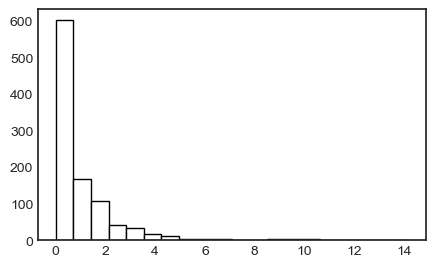

In [36]:
plt.hist(deviance_diffs, color='white', edgecolor='black', bins=20)

In [37]:
#deviance_diffsの中でdeviance_diffより大きいものの個数
print(sum(np.array(deviance_diffs) > deviance_diff))

29


In [41]:
#model_const,model_xにanovaを適用
deviance_diff = model_const.deviance - model_x.deviance
df_diff = model_const.df_resid - model_x.df_resid
p_value = chi2.sf(deviance_diff, df_diff)
print(f'Deviance Difference: {deviance_diff}, DF: {df_diff}, P-Value: {p_value}')

Deviance Difference: 4.513941078851744, DF: 1, P-Value: 0.03361969100898695
